<h2 style="text-align: center">Used For Uptime Analysis</h2>

In [1]:
import pandas as pd

df = pd.read_csv('data_.csv')
df = df.drop(columns=['Data URI'])
df.head()

,Time,Content
0,2025-03-09T08:58:48.000Z,"{""devUI"":""08:D1:F9:35:B5:48"",""time_at_device"":..."
1,2025-03-09T08:59:00.000Z,"{""devUI"":""08:D1:F9:35:B5:48"",""time_at_device"":..."
2,2025-03-09T08:59:10.000Z,"{""devUI"":""08:D1:F9:35:B5:48"",""time_at_device"":..."
3,2025-03-09T08:59:18.000Z,"{""devUI"":""08:D1:F9:35:B5:48"",""time_at_device"":..."
4,2025-03-09T08:59:30.000Z,"{""devUI"":""08:D1:F9:35:B5:48"",""time_at_device"":..."


In [2]:
import json

def clean_json(text):
    try:
        return json.loads(text.replace("\n", "").replace("\r", "").strip())  # Hapus karakter newline dan spasi ekstra
    except json.JSONDecodeError:
        return None  # Jika gagal, isi dengan None

df["Content"] = df["Content"].apply(clean_json)
df = df.dropna(subset=["Content"])

# Ekstrak data JSON menjadi kolom sendiri
df_json = df["Content"].apply(pd.Series)
df = pd.concat([df.drop(columns=["Content"]), df_json], axis=1)

df.head()

,Time,devUI,time_at_device,time_received_at_gateway,time_send_from_gateway,RSSI,protocol,voltage,current,power,energy,frequency,power_factor
0,2025-03-09T08:58:48.000Z,08:D1:F9:35:B5:48,2025-03-09 08:58:32,2025-03-09 08:58:47,2025-03-09 08:58:47.872,-108,http,231.20,0.09,7.30,0.78,433000000.0,0.36
1,2025-03-09T08:59:00.000Z,08:D1:F9:35:B5:48,2025-03-09 08:58:42,2025-03-09 08:58:57,2025-03-09 08:58:57.224,-107,http,231.60,0.09,7.20,0.78,433000000.0,0.35
2,2025-03-09T08:59:10.000Z,08:D1:F9:35:B5:48,2025-03-09 08:58:53,2025-03-09 08:59:07,2025-03-09 08:59:07.592,-108,http,231.30,0.09,7.50,0.78,433000000.0,0.36
3,2025-03-09T08:59:18.000Z,08:D1:F9:35:B5:48,2025-03-09 08:59:03,2025-03-09 08:59:18,2025-03-09 08:59:18.967,-108,mqtt,230.90,0.09,7.20,0.78,433000000.0,0.35
4,2025-03-09T08:59:30.000Z,08:D1:F9:35:B5:48,2025-03-09 08:59:13,2025-03-09 08:59:28,2025-03-09 08:59:28.330,-108,mqtt,231.70,0.09,7.10,0.78,433000000.0,0.35


In [3]:
# Ubah kolom "Time" menjadi format datetime
df["Time"] = pd.to_datetime(df["Time"], errors="coerce")

# Tambahkan 1 detik ke semua baris
df["Time"] = df["Time"] + pd.Timedelta(seconds=1)

# Ubah kembali ke format string jika diperlukan
df["Time"] = df["Time"].dt.strftime("%Y-%m-%d %H:%M:%S")
df = df.rename(columns={"Time": "received_at_server"})

df.head()

,received_at_server,devUI,time_at_device,time_received_at_gateway,time_send_from_gateway,RSSI,protocol,voltage,current,power,energy,frequency,power_factor
0,2025-03-09 08:58:49,08:D1:F9:35:B5:48,2025-03-09 08:58:32,2025-03-09 08:58:47,2025-03-09 08:58:47.872,-108,http,231.20,0.09,7.30,0.78,433000000.0,0.36
1,2025-03-09 08:59:01,08:D1:F9:35:B5:48,2025-03-09 08:58:42,2025-03-09 08:58:57,2025-03-09 08:58:57.224,-107,http,231.60,0.09,7.20,0.78,433000000.0,0.35
2,2025-03-09 08:59:11,08:D1:F9:35:B5:48,2025-03-09 08:58:53,2025-03-09 08:59:07,2025-03-09 08:59:07.592,-108,http,231.30,0.09,7.50,0.78,433000000.0,0.36
3,2025-03-09 08:59:19,08:D1:F9:35:B5:48,2025-03-09 08:59:03,2025-03-09 08:59:18,2025-03-09 08:59:18.967,-108,mqtt,230.90,0.09,7.20,0.78,433000000.0,0.35
4,2025-03-09 08:59:31,08:D1:F9:35:B5:48,2025-03-09 08:59:13,2025-03-09 08:59:28,2025-03-09 08:59:28.330,-108,mqtt,231.70,0.09,7.10,0.78,433000000.0,0.35


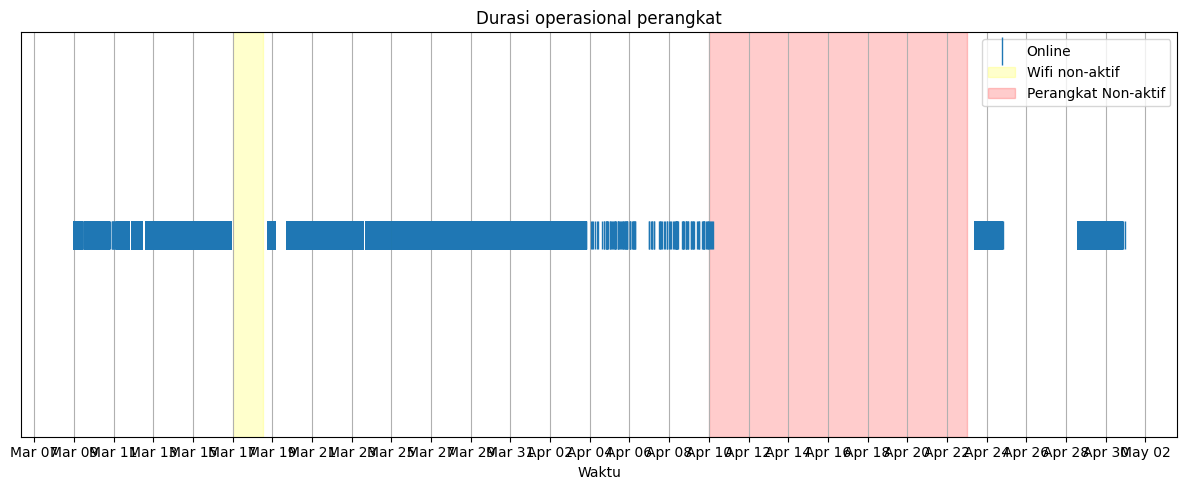

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df['timestamp'] = pd.to_datetime(df['received_at_server'])
start_date = pd.Timestamp('2025-04-10')
end_date = pd.Timestamp('2025-04-23')

start_date1 = pd.Timestamp('2025-03-17')
end_date2 = pd.Timestamp('2025-03-18 12:59:59')

# Hitung selisih waktu antar data
df['delta'] = df['timestamp'].diff()

# Tetapkan ambang batas waktu keterlambatan (misal: 10 menit)
threshold = pd.Timedelta(minutes=60)

# Tandai titik-titik disconnect
disconnects = df[df['delta'] > threshold]

# Plot semua timestamp sebagai titik
plt.figure(figsize=(12, 5))
plt.plot(df['timestamp'], [1]*len(df), '|', markersize=20, label="Online")
plt.axvspan(start_date1, end_date2, color='yellow', alpha=0.2, label='Wifi non-aktif')
plt.axvspan(start_date, end_date, color='red', alpha=0.2, label='Perangkat Non-aktif')
# Plot disconnect sebagai garis vertikal
# for t in disconnects['timestamp']:
#     plt.axvline(x=t, color='red', linestyle=':', alpha=0.5, label="Disconnect" if t == disconnects['timestamp'].iloc[0] else "")

# Format sumbu X agar hanya menampilkan Bulan dan Tanggal
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))  # contoh: Mar 18
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))    # setiap 2 hari ditampilkan

plt.yticks([])  # Hilangkan sumbu Y karena tidak penting
plt.xlabel("Waktu")
plt.title("Durasi operasional perangkat")
plt.legend()
plt.tight_layout()
plt.grid(axis='x')
plt.show()


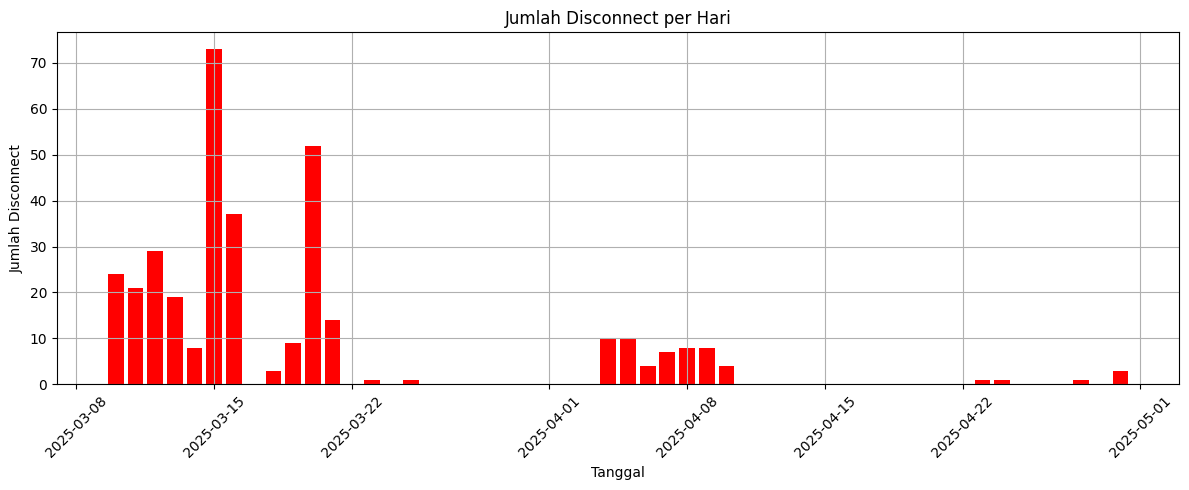

In [9]:
# Ambil waktu disconnect (selisih waktu terlalu lama)
disconnects = df[df['delta'] > threshold]

# Kelompokkan jumlah disconnect per hari
disconnects_per_day = disconnects['timestamp'].dt.date.value_counts().sort_index()

# Visualisasi
plt.figure(figsize=(12, 5))
plt.bar(disconnects_per_day.index, disconnects_per_day.values, color='red')
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Disconnect")
plt.title("Jumlah Disconnect per Hari")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

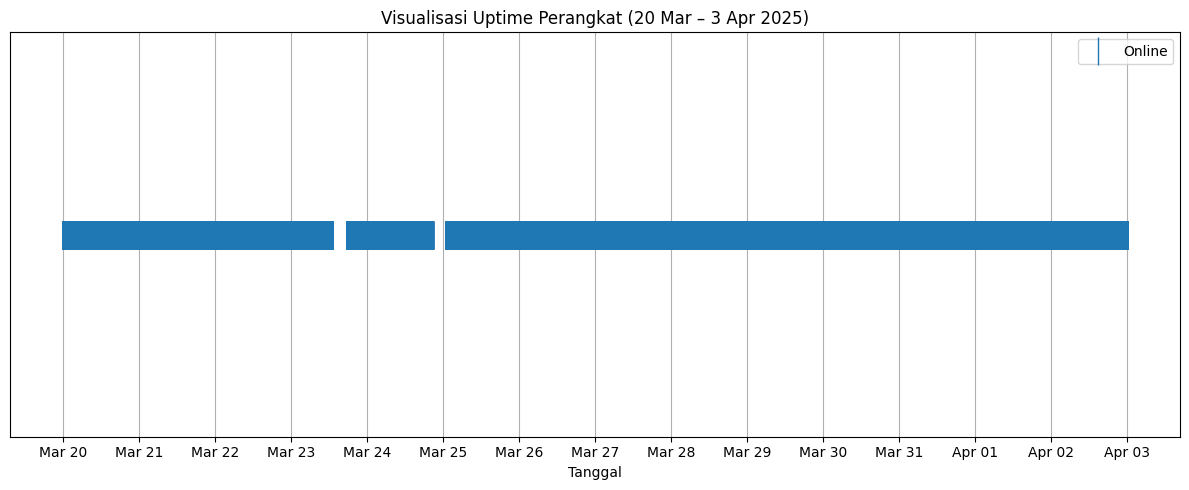

In [18]:
import matplotlib.dates as mdates

# Filter rentang tanggal
start_date = pd.to_datetime("2025-03-20")
end_date = pd.to_datetime("2025-04-03")
# Tetapkan ambang batas waktu keterlambatan (misal: 10 menit)
threshold = pd.Timedelta(seconds=20)

df_filtered = df[(df['timestamp'] >= start_date) & (df['timestamp'] <= end_date)]
disconnects_filtered = disconnects[(disconnects['timestamp'] >= start_date) & (disconnects['timestamp'] <= end_date)]

# Plot
plt.figure(figsize=(12, 5))
plt.plot(df_filtered['timestamp'], [1]*len(df_filtered), '|', markersize=20, label="Online")

# for i, t in enumerate(disconnects_filtered['timestamp']):
#     plt.axvline(x=t, color='red', linestyle='--', alpha=0.5, label="Disconnect" if i == 0 else "")

# Format sumbu X agar hanya menampilkan Bulan dan Tanggal
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))  # contoh: Mar 18
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))    # setiap 2 hari ditampilkan

plt.yticks([])
plt.xlabel("Tanggal")
plt.title("Visualisasi Uptime Perangkat (20 Mar – 3 Apr 2025)")
plt.legend()
plt.grid(axis='x')
plt.tight_layout()
plt.show()

📊 Ringkasan Disconnect & Uptime
Jumlah disconnect       : 12
Durasi tiap disconnect :
          disconnect_start      disconnect_end disconnect_duration
59832  2025-03-20 21:26:34 2025-03-20 21:27:36     0 days 00:01:02
64268  2025-03-21 08:42:52 2025-03-21 08:54:15     0 days 00:11:23
82283  2025-03-23 13:02:32 2025-03-23 17:40:57     0 days 04:38:25
91036  2025-03-24 20:43:01 2025-03-25 00:52:26     0 days 04:09:25
91089  2025-03-25 01:08:39 2025-03-25 01:10:40     0 days 00:02:01
91090  2025-03-25 01:10:40 2025-03-25 01:12:17     0 days 00:01:37
91174  2025-03-25 01:41:38 2025-03-25 01:42:40     0 days 00:01:02
91207  2025-03-25 01:53:32 2025-03-25 01:54:34     0 days 00:01:02
91410  2025-03-25 03:02:55 2025-03-25 03:03:57     0 days 00:01:02
91497  2025-03-25 03:33:59 2025-03-25 03:35:01     0 days 00:01:02
93777  2025-03-25 10:35:28 2025-03-25 10:36:31     0 days 00:01:03
108934 2025-03-27 08:35:09 2025-03-27 08:40:09     0 days 00:05:00
Total waktu pengamatan : 13 days 23:59:46
T

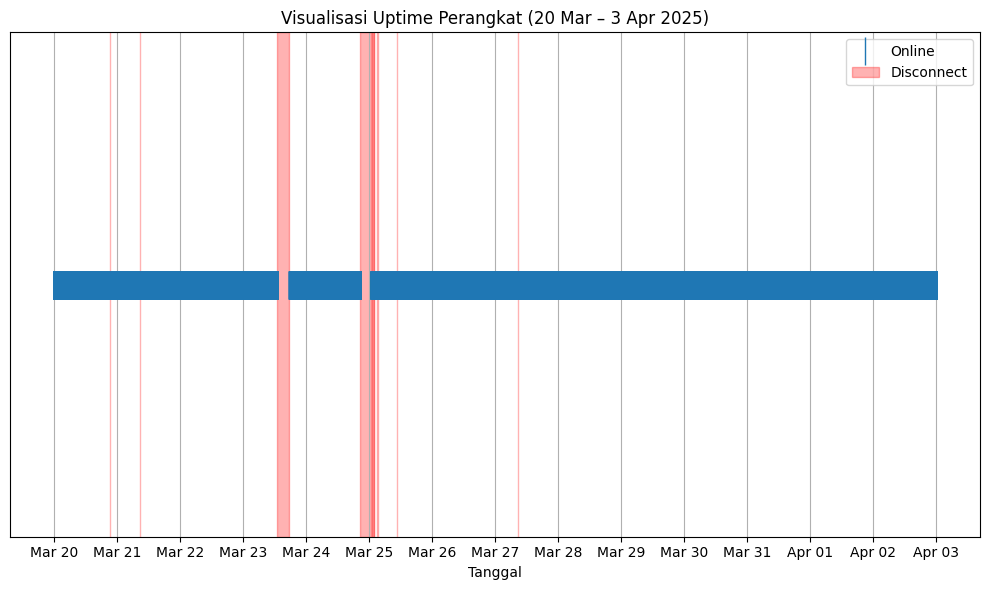

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 1. Konversi kolom timestamp ke datetime
df['timestamp'] = pd.to_datetime(df['received_at_server'])

# 2. Filter tanggal
start_date = pd.to_datetime("2025-03-20")
end_date = pd.to_datetime("2025-04-03")
df_filtered = df[(df['timestamp'] >= start_date) & (df['timestamp'] <= end_date)].copy()

# 3. Sort dan hitung selisih antar data
df_filtered = df_filtered.sort_values('timestamp')
df_filtered['delta'] = df_filtered['timestamp'].diff()

# 4. Tetapkan ambang waktu sebagai batas disconnect
threshold = pd.Timedelta(seconds=60)
disconnect_mask = df_filtered['delta'] > threshold

# 5. Ambil timestamp disconnect
disconnects = df_filtered[disconnect_mask].copy()
disconnects['disconnect_start'] = disconnects['timestamp'] - disconnects['delta']
disconnects['disconnect_end'] = disconnects['timestamp']
disconnects['disconnect_duration'] = disconnects['delta']

# 6. Hitung total uptime dan downtime
total_duration = df_filtered['timestamp'].iloc[-1] - df_filtered['timestamp'].iloc[0]
total_downtime = disconnects['disconnect_duration'].sum()
uptime_percentage = 100 * (1 - total_downtime / total_duration)

# 7. Print ringkasan hasil
print("📊 Ringkasan Disconnect & Uptime")
print(f"Jumlah disconnect       : {len(disconnects)}")
print("Durasi tiap disconnect :")
print(disconnects[['disconnect_start', 'disconnect_end', 'disconnect_duration']])
print(f"Total waktu pengamatan : {total_duration}")
print(f"Total downtime         : {total_downtime}")
print(f"Uptime (%)             : {uptime_percentage:.2f}%")

# 8. Visualisasi
plt.figure(figsize=(10, 6))
plt.plot(df_filtered['timestamp'], [1]*len(df_filtered), '|', markersize=20, label="Online")

# Tampilkan garis vertikal untuk disconnect
for i, row in disconnects.iterrows():
    plt.axvspan(row['disconnect_start'], row['disconnect_end'], color='red', alpha=0.3,
                label="Disconnect" if i == disconnects.index[0] else "")

# Format sumbu X
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))

plt.yticks([])
plt.xlabel("Tanggal")
plt.title("Visualisasi Uptime Perangkat (20 Mar – 3 Apr 2025)")
plt.legend()
plt.grid(axis='x')
plt.tight_layout()
plt.show()


In [39]:
df_filtered['delta'] = df_filtered['timestamp'].diff().dt.total_seconds()

# Drop nilai NaN di baris pertama
delta_values = df_filtered['delta'].dropna()

# Hitung jitter sebagai standar deviasi dari delta
jitter = delta_values.std()

print(f"Jitter (detik): {jitter:.3f}")

Jitter (detik): 68.738
